In [1]:
import os

In [2]:
from lsst.sims.photUtils import BandpassDict

In [3]:
import pandas as pd

In [4]:
import obscond

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [13]:
TotbpDict, hwbpDict = BandpassDict.loadBandpassesFromFiles()

###  Check with a quick plot that Total and HardWare make sense

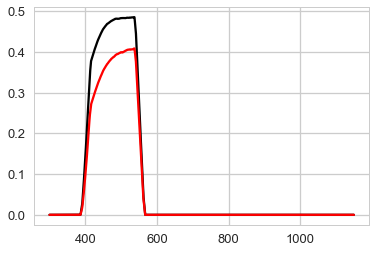

In [14]:
fig, ax = plt.subplots()
ax.plot(hwbpDict['g'].wavelen, hwbpDict['g'].sb, 'k')
ax.plot(hwbpDict['g'].wavelen, TotbpDict['g'].sb, 'r')

In [15]:
pointings = pd.read_csv(os.path.join(obscond.example_data_dir, 'example_pointings.csv'), index_col='obsHistID')

In [16]:
skycalc = obscond.SkyCalculations(photparams="LSST", hwBandpassDict=hwbpDict)

In [17]:
pointings[['fieldRA', 'fieldDec', 'expMJD', 'airmass', 'FWHMeff', 'filter']].head()

,fieldRA,fieldDec,expMJD,airmass,FWHMeff,filter
obsHistID,,,,,,
230,0.925184,-0.478900,59580.139555,1.090199,1.121968,r
1679570,0.000000,-0.794553,62086.152635,1.169360,0.837221,z
1679569,0.000000,-0.794553,62086.152218,1.168118,0.836687,z
1679568,0.000000,-0.794553,62086.151802,1.166882,0.836156,z
1679567,0.000000,-0.794553,62086.151385,1.165654,0.835628,z


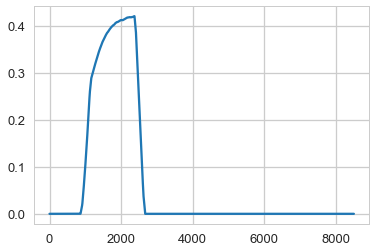

In [18]:
plt.plot(skycalc.adb.bandpassForAirmass('g', 1.00).sb)

## Demos

Try out an example where the airmass used for calculating the bandpass is calculated

In [19]:
skycalc.fiveSigmaDepth('g', 1.086662, 0.925184, -0.4789, 61044.077855,  use_provided_airmass=False)

23.04318036522919

Try it out when a value has not been provided but `use_provided_airmass` is True

In [20]:
skycalc.fiveSigmaDepth('g', 1.086662, 0.925184, -0.4789, 61044.077855,  use_provided_airmass=True)

23.04318036522919

In [21]:
skycalc.fiveSigmaDepth('g', 1.086662, 0.925184, -0.4789, 61044.077855,  provided_airmass=1.008652, 
                       use_provided_airmass=True)

23.04318036522919

### Calculating the skymag

In [22]:
skycalc.skymag('r', 0.925, -0.4789, 59580.14)

21.260547308777653

### Calculating values for an OpSim dataframe

In [23]:
skycalc.calculatePointings(pointings)

,airmass,altitude,azimuth,moonRA,moonDec,moonAlt,moonAZ,moonPhase,sunAlt,sunAz,fiveSigmaDepth,filtSkyBrightness
obsHistID,,,,,,,,,,,,
230,1.091673,1.158057,4.717216,4.475412,-0.410110,-0.630627,3.065632,4.041352,-0.574879,3.552349,24.032083,21.261421
1679570,1.164406,1.032937,4.030332,2.736664,0.108490,-0.531562,1.769546,36.007107,-0.713472,3.402641,23.098397,19.285369
1679569,1.163186,1.034697,4.029251,2.736550,0.108529,-0.533710,1.771027,36.011715,-0.712886,3.405852,23.099559,19.286396
1679568,1.161976,1.036452,4.028160,2.736436,0.108568,-0.535852,1.772506,36.016312,-0.712295,3.409051,23.100714,19.287414
1679567,1.160771,1.038209,4.027054,2.736321,0.108608,-0.537999,1.773993,36.020920,-0.711695,3.412254,23.101863,19.288428
1679566,1.159573,1.039965,4.025934,2.736206,0.108647,-0.540145,1.775482,36.025532,-0.711088,3.415453,23.103007,19.289436
1679565,1.158384,1.041715,4.024803,2.736092,0.108686,-0.542286,1.776971,36.030128,-0.710476,3.418640,23.104144,19.290436
1679564,1.157200,1.043468,4.023657,2.735977,0.108725,-0.544431,1.778467,36.034737,-0.709855,3.421832,23.105275,19.291432
1679563,1.156023,1.045219,4.022497,2.735862,0.108765,-0.546575,1.779966,36.039345,-0.709228,3.425019,23.108564,19.292422


In [18]:
x = skycalc.calculatePointings(pointings).join(pointings, rsuffix='opsim')

In [19]:
x['airmass_diff'] = x.airmass - x.airmassopsim

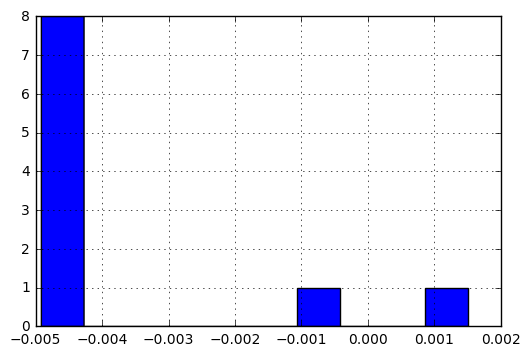

In [20]:
x.airmass_diff.hist()